# Curve Smoothning

*A segmentation boundary may be explicitly represented using a sequence of points connected by line segments, which typically delineates
an object in the image. Assume that an N-times-2 matrix X contains x
and y coordinates of N points which define a closed curve, a so-called
snake 1. 1 Michael Kass, Andrew Witkin, and
Demetri Terzopoulos. Snakes: Active contour models. International Journal of Computer Vision, 1(4):321–331, 1988
To impose smoothness to this representation, we will need to smooth
the curve*

In [43]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.abspath(''), '..', '..'))
from toolbox import kernel, smooth
import imp
imp.reload(kernel)
imp.reload(smooth)

<module 'toolbox.smooth' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week1/../../toolbox/smooth.py'>

In [9]:
dino_curve = np.loadtxt(os.path.join('data', 'curves', 'dino.txt'))
print(f'Dino shape: {dino_curve.shape}')
dino_noisy_curve = np.loadtxt(os.path.join('data', 'curves', 'dino_noisy.txt'))
print(f'Dino Noisy shape: {dino_noisy_curve.shape}')
N = dino_curve.shape[0]

Dino shape: (200, 2)
Dino Noisy shape: (200, 2)


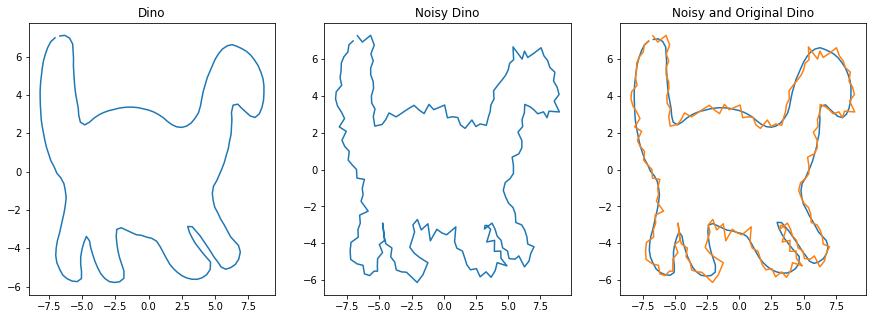

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].set_title('Dino')
ax[0].plot(dino_curve[:,0], dino_curve[:,1])

ax[1].set_title('Noisy Dino')
ax[1].plot(dino_noisy_curve[:,0], dino_noisy_curve[:,1])

ax[2].set_title('Noisy and Original Dino')
ax[2].plot(dino_curve[:,0], dino_curve[:,1])
ax[2].plot(dino_noisy_curve[:,0], dino_noisy_curve[:,1])

## Task 1

*Implement curve smoothing as in Equation 1.10 and test it for various
values of lambda. Try using smoothing iteratively to achieve a visible result
for small lambda.*

In [11]:
k = 5
lambdas = np.linspace(0, 1, k)
L = kernel.neighbor_avg_point_displacement(N)
print(f'L shape: {L.shape}')
print(L)

L shape: (200, 200)
[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]


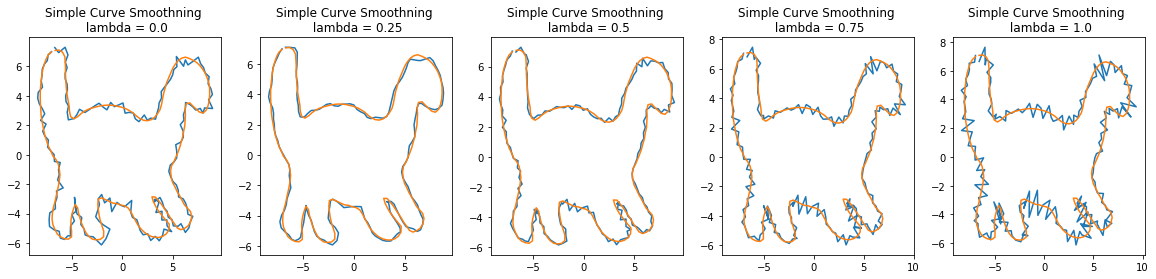

In [12]:
fig, ax = plt.subplots(1,5, figsize=(20,4))

for i, l in enumerate(lambdas):
    smooth_im = smooth.simple_curve_smoothing(l, L, dino_noisy_curve)
    ax[i].set_title(f'Simple Curve Smoothning \n lambda = {l}')
    ax[i].plot(smooth_im[:,0], smooth_im[:,1])
    ax[i].plot(dino_curve[:,0], dino_curve[:,1])

plt.show()

### Iterative Smoothing

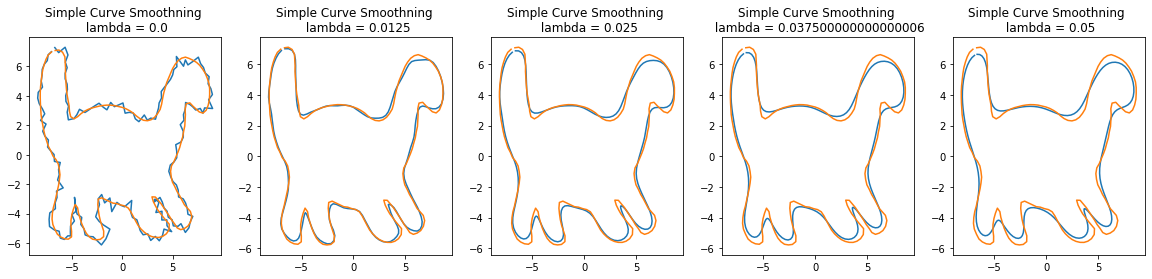

In [13]:
n_iter = 100
lambdas = np.linspace(0, 0.05, k)
fig, ax = plt.subplots(1,5, figsize=(20,4))

for i, l in enumerate(lambdas):
    smooth_im = smooth.iter_simple_curve_smoothing(l, L, dino_noisy_curve, n_iter)
    ax[i].set_title(f'Simple Curve Smoothning \n lambda = {l}')
    ax[i].plot(smooth_im[:,0], smooth_im[:,1])
    ax[i].plot(dino_curve[:,0], dino_curve[:,1])

plt.show()

## Task 2

*Implement curve smoothing as in Equation 1.12 (implicit smoothing)
and test it for various values of lambda. <br> Do you need an iterative approach
of this smoothing?*

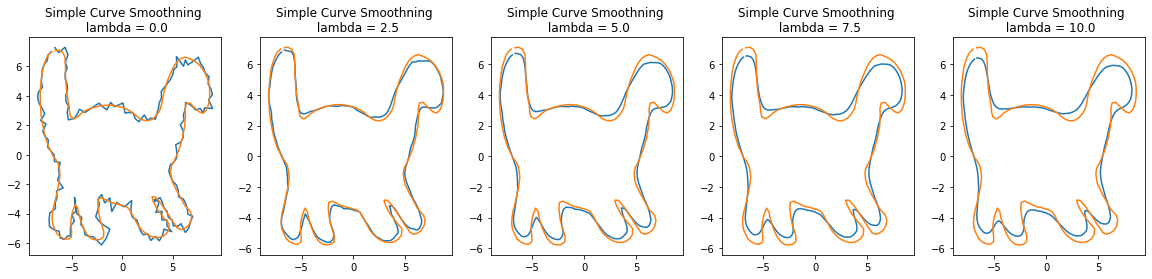

In [14]:
k = 5
lambdas = np.linspace(0, 10, k)
L = kernel.neighbor_avg_point_displacement(N)

fig, ax = plt.subplots(1,5, figsize=(20,4))

for i, l in enumerate(lambdas):
    smooth_im = smooth.implicit_curve_smoothing(l, L, dino_noisy_curve)
    ax[i].set_title(f'Simple Curve Smoothning \n lambda = {l}')
    ax[i].plot(smooth_im[:,0], smooth_im[:,1])
    ax[i].plot(dino_curve[:,0], dino_curve[:,1])

plt.show()

## Task 3

*Implement implicit curve smoothing but with the extended kernel. <br>
This means that your implementation instead of lambda*L uses a matrix that
combines elasticity and rigidity, as in Equation 1.13. <br> 
Test smoothing with various values of alpha and beta. What do you achieve when choosing
alpha and beta large and small?*

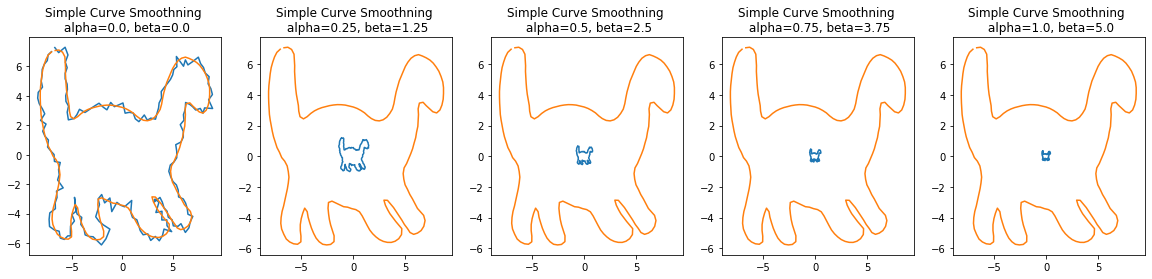

In [47]:
k = 5
alphas = np.linspace(0, 1,k)
betas = np.linspace(0, 5,k)
A = kernel.neighbor_avg_point_displacement(N)
B = kernel.neighbor_avg_point_displacement(N, -6)

fig, ax = plt.subplots(1,5, figsize=(20,4))

for i, (alpha, beta) in enumerate(zip(alphas, betas)):
    smooth_im = smooth.elasticity_rigidity_smoothing(alpha, beta, A, B, dino_noisy_curve)
    ax[i].set_title(f'Simple Curve Smoothning \n alpha={alpha}, beta={beta}')
    ax[i].plot(smooth_im[:,0], smooth_im[:,1])
    ax[i].plot(dino_curve[:,0], dino_curve[:,1])

plt.show()